In [1]:
import scipy.stats as stats
import seaborn as sns
import numpy as np

#### 14.1  The sensitivity and specificity of a test for a disease

##### 14.1.2 

In [2]:
def get_next_samples(a_pi, b_pi, a_S, b_S, a_C, b_C, a, b, pi, S, C):
    Y1_prob = (pi*S)/ (pi*S + (1-pi)*(1-C))
    Y1 = stats.binom.rvs(a, Y1_prob, 0, 1)
    Y2_prob = (pi*(1-S))/ (pi*(1-S) + (1-pi)*C)
    Y2 = stats.binom.rvs(b, Y2_prob, size=1)
    pi_calc = stats.beta.rvs(Y1+Y2+a_pi, a+b-Y1-Y2+b_pi, size=1)
    S_calc = stats.beta.rvs(Y1+a_S, Y2+b_S, size=1)
    C_calc = stats.beta.rvs(b-Y2+a_C, a-Y1+b_C, size=1)
    
    return Y1[0], Y2[0], pi_calc[0], S_calc[0], C_calc[0]

In [3]:
def sample(a, b, a_pi, b_pi, a_S, b_S, a_C, b_C, iters=100):
    Y1s = [np.random.randint(1, a, 1)[0]]
    Y2s = [np.random.randint(1, b, 1)[0]]
    pis = [np.random.uniform(0, 1, 1)[0]]
    Ss = [np.random.uniform(0, 1, 1)[0]]
    Cs = [np.random.uniform(0, 1, 1)[0]]
    
    for i in range(iters):
        Y1, Y2, pi, S, C = get_next_samples(a_pi, b_pi, a_S, b_S, a_C, b_C, a, b, pis[-1], Ss[-1], Cs[-1])
        Y1s.append(Y1)
        Y2s.append(Y2)
        pis.append(pi)
        Ss.append(S)
        Cs.append(C)
        
    return Y1s, Y2s, pis, Ss, Cs

##### 14.1.3 

In [4]:
chains = sample(80, 20, 1, 1, 1, 1, 1, 1, iters=50000)

C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

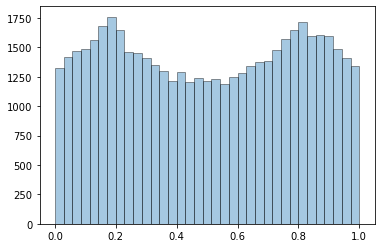

In [5]:
sns.distplot(chains[2], kde=False, hist_kws={"edgecolor": "k"})

##### 14.1.4

In [6]:
chains = sample(20, 80, 1, 1, 10, 1, 10, 1, iters=10000)

<AxesSubplot:>

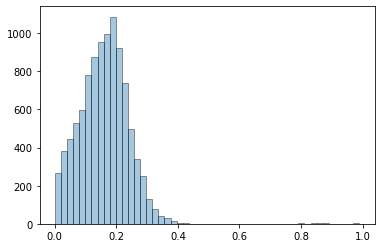

In [7]:
sns.distplot(chains[2], kde=False, hist_kws={"edgecolor": "k"})

##### 14.1.5

In [8]:
chains = sample(20, 80, 1, 10, 1, 1, 1, 1, iters=10000)

<AxesSubplot:>

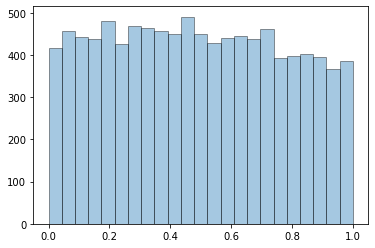

In [9]:
sns.distplot(chains[3], kde=False, hist_kws={"edgecolor": "k"})

<AxesSubplot:>

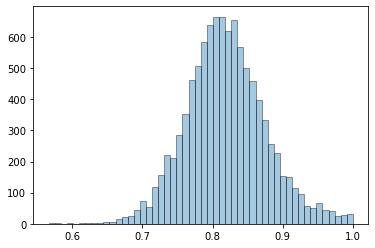

In [10]:
sns.distplot(chains[4], kde=False, hist_kws={"edgecolor": "k"})

##### 14.1.6

In [11]:
chains = sample(20, 80, 1, 10, 1, 1, 10, 1, iters=10000)

<AxesSubplot:>

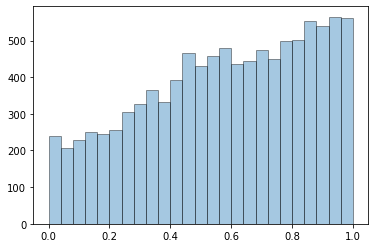

In [12]:
sns.distplot(chains[3], kde=False, hist_kws={"edgecolor": "k"})

##### 14.1.7

<AxesSubplot:>

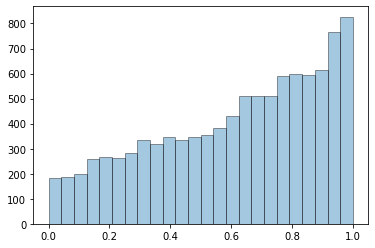

In [13]:
chains = sample(200, 800, 1, 10, 1, 1, 10, 1, iters=10000)
sns.distplot(chains[3], kde=False, hist_kws={"edgecolor": "k"})